In [1]:
import pandas as pd

# Reading the csv file
stud = pd.read_csv("/content/StudentsPerformance.csv")


In [2]:
stud.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
stud.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [4]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
# changing the column names
stud = stud.rename(columns={'race/ethnicity': 'race', 'parental level of education': 'Parents_education','reading score':'reading','math score':'maths','writing score':'writing'}) 



In [6]:
stud = stud.drop(columns={'test preparation course','lunch'}, axis=1)
stud.head()

,gender,race,Parents_education,maths,reading,writing
0,female,group B,bachelor's degree,72,72,74
1,female,group C,some college,69,90,88
2,female,group B,master's degree,90,95,93
3,male,group A,associate's degree,47,57,44
4,male,group C,some college,76,78,75


In [7]:

print(stud.isna().sum())

gender               0
race                 0
Parents_education    0
maths                0
reading              0
writing              0
dtype: int64


In [8]:
stud['gender'] = pd.Categorical(stud['gender'])
stud['race'] = pd.Categorical(stud['race'])
stud['Parents_education'] = pd.Categorical(stud['Parents_education'])

In [9]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             1000 non-null   category
 1   race               1000 non-null   category
 2   Parents_education  1000 non-null   category
 3   maths              1000 non-null   int64   
 4   reading            1000 non-null   int64   
 5   writing            1000 non-null   int64   
dtypes: category(3), int64(3)
memory usage: 27.0 KB


In [10]:
stud.to_csv("cleaned_StudentsPerformance.csv", index=False)

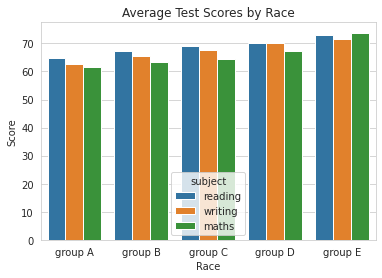

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

# Group the data by race and calculate the mean scores for each subject
mean_scores = stud.groupby('race')[['reading', 'writing', 'maths']].mean()

# Reset the index to create a 'race' column
mean_scores = mean_scores.reset_index()

# Melt the data to create a long-form dataframe for plotting
mean_scores_melt = pd.melt(mean_scores, id_vars='race', var_name='subject', value_name='score')

# Plot the data as a grouped bar chart
sns.barplot(x='race', y='score', hue='subject', data=mean_scores_melt)

plt.title('Average Test Scores by Race')
plt.xlabel('Race')
plt.ylabel('Score')
plt.show()


<AxesSubplot:xlabel='reading', ylabel='writing'>

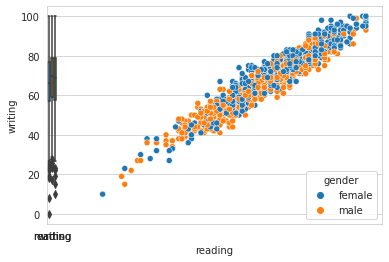

In [21]:

import seaborn as sns
sns.boxplot(data=stud)
sns.scatterplot(x='reading', y='writing', hue='gender', data=stud)

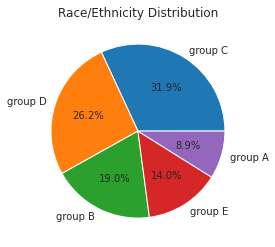

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Create a pie chart of race/ethnicity counts
stud['race'].value_counts().plot(kind='pie', autopct='%1.1f%%')

# Set the title and labels
plt.title('Race/Ethnicity Distribution')
plt.ylabel('')
plt.show()


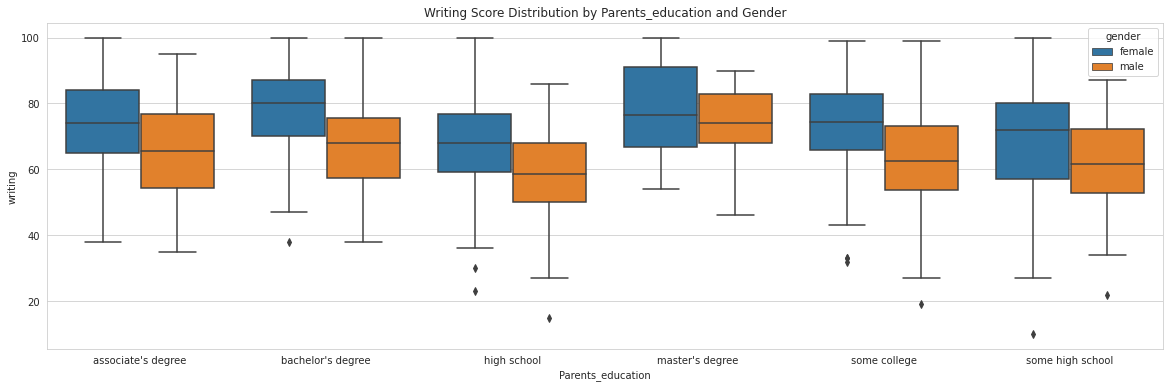

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot
plt.figure(figsize=(20, 6))
sns.boxplot(data=stud, x="Parents_education", y="writing", hue="gender")
plt.title("Writing Score Distribution by Parents_education and Gender")
plt.xlabel("Parents_education")
plt.ylabel("writing")

plt.show()


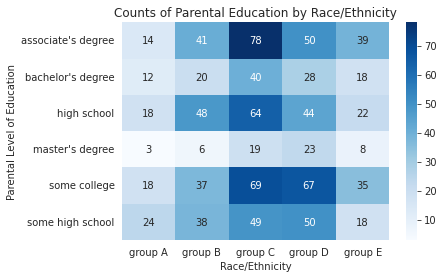

In [29]:
pivot = stud.pivot_table(index='Parents_education', columns='race', values='maths', aggfunc='count')

# Create a heatmap
sns.heatmap(pivot, cmap='Blues', annot=True, fmt='.0f')

# Set the plot title and axis labels
plt.title('Counts of Parental Education by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Parental Level of Education')

# Show the plot
plt.show()

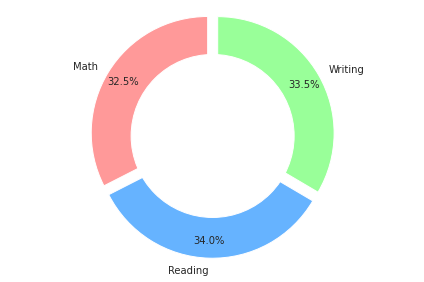

In [30]:
import pandas as pd
import matplotlib.pyplot as plt



# compute the total time spent on each subject
math_total = stud['maths'].sum()
reading_total = stud['reading'].sum()
writing_total = stud['writing'].sum()

# compute the percentage of time spent on each subject
math_percentage = math_total / (math_total + reading_total + writing_total) * 100
reading_percentage = reading_total / (math_total + reading_total + writing_total) * 100
writing_percentage = writing_total / (math_total + reading_total + writing_total) * 100

# create a pie chart with the computed percentages
labels = ['Math', 'Reading', 'Writing']
sizes = [math_percentage, reading_percentage, writing_percentage]
colors = ['#ff9999', '#66b3ff', '#99ff99']
explode = (0.05, 0.05, 0.05) # explode the slices a bit to highlight them

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)

# draw a circle at the center of the chart to make it look like a donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# set the aspect ratio to be equal so that the chart looks circular
ax1.axis('equal')  

plt.tight_layout()
plt.show()